In [30]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
from matplotlib_inline.backend_inline import set_matplotlib_formats

# Set the desired output format
set_matplotlib_formats('svg')

from tol_colors import tol_cmap, tol_cset
cmap = tol_cset('bright')

import numpy as np
from copy import deepcopy
from online_cp.martingale import SimpleJumper, PluginMartingale

In [31]:
usps_orig = np.load('../data/data_martingale_experiment/p_values_usps_orig.npy')
usps_shuffle = np.load('../data/data_martingale_experiment/p_values_usps_shuffle.npy')

satlog_orig = np.load('../data/data_martingale_experiment/p_values_satelite_orig.npy')
satlog_shuffle = np.load('../data/data_martingale_experiment/p_values_satelite_shuffle.npy')

In [32]:
def run_martingale(martingale, p_values):
    for p in p_values:
        martingale.update_martingale_value(p)
    return deepcopy(martingale)

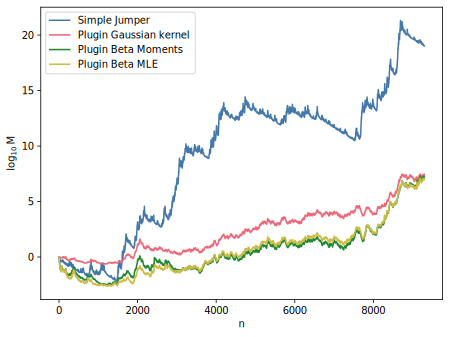

In [ ]:
min_sample_size_plugin = 100
min_sample_size_parametric = 10
J = 0.01
C = 1

# FIXME: What is the problem with the Beta kernel?
Martingales = {
    'Simple Jumper': SimpleJumper(J=J, warnings=False),
    'Plugin Gaussian kernel': PluginMartingale(warnings=False, min_sample_size=min_sample_size_plugin),
    # 'Plugin Beta kernel': PluginMartingale(kernel='beta', warnings=False, min_sample_size=min_sample_size_plugin, C=C),
    'Plugin Beta Moments': PluginMartingale(method='beta', beta_method='moment', warnings=False, min_sample_size=min_sample_size_parametric),
    'Plugin Beta MLE': PluginMartingale(method='beta', beta_method='mle', warnings=False, min_sample_size=min_sample_size_parametric),
}

fig1, ax = plt.subplots()
p_values = usps_orig
for i, (name, M) in enumerate(Martingales.items()):
    ax.plot(run_martingale(martingale=M, p_values=p_values).log10_martingale_values, label=name, color=cmap[i])
ax.set_ylabel(r'$\log_{10}M$')
ax.set_xlabel(r'$n$')
ax.legend()
fig1.tight_layout()

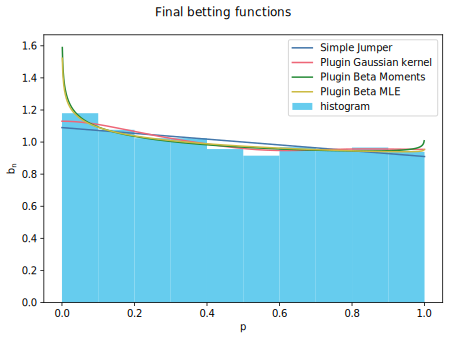

In [70]:
fig2, ax = plt.subplots()
prange = np.linspace(0, 1, endpoint=True, num=1000)
for i, (name, M) in enumerate(Martingales.items()):
    ax.plot(prange, M.b_n(prange), label=name, color=cmap[i])
ax.hist(p_values, density=True, label='histogram', color=cmap[i+1])
ax.set_ylabel(r'$b_n$')
ax.set_xlabel(r'$p$')
fig2.suptitle('Final betting functions')
ax.legend()
fig2.tight_layout()